# House SalePrice Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Import train dataset
df_train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Import test dataset
df_test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")#read test dataset
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [6]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

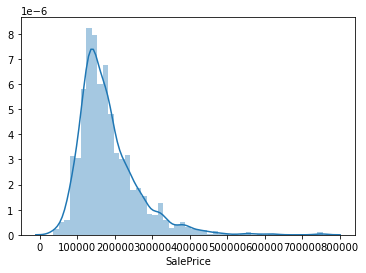

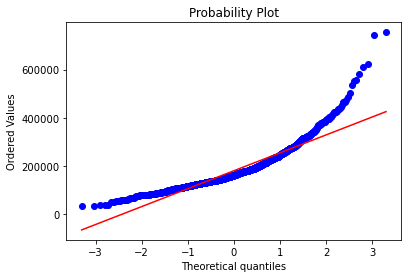

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
#Target variable distribution -> positive skewness
sns.distplot(df_train['SalePrice'])  

#QQ-plot
from scipy import stats
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

#Descriptive statistics summary
df_train['SalePrice'].describe()

Normality means that your data follows the normal distributed. **Skewness** is how much the overall shape of a distribution deviates from the shape of the normal distribution. Skewness of the normal distribution is zero. 

Skewness are:
    1. Positively skewed -> longer tail on the right side.
    2. Negatively skewed -> longer tail on the left side.

To reduce the skewness we do transformation:
    1. positively skewed -> apply logarithmic or square root transformation.
    2. negatively skewed -> apply exponential or power transformation.


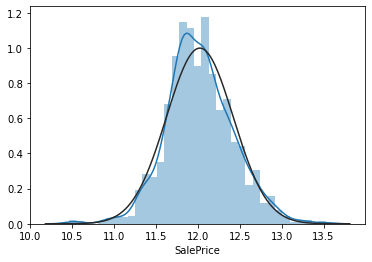

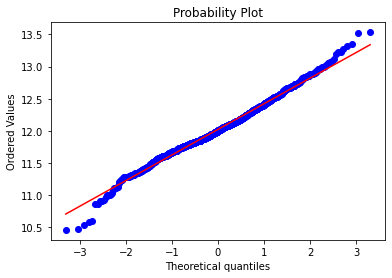

In [10]:
# Log-transformation of the target variable
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
y = df_train['SalePrice']

#Check the new distribution 
from scipy.stats import norm, skew
sns.distplot(df_train['SalePrice'] , fit=norm)


#new probability plot
from scipy import stats
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [11]:
df_train.skew().sort_values(ascending=False) 

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
SalePrice         0.121347
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

In [12]:
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns
train_num = df_train[numerical_features]
skewness = train_num.apply(lambda x: skew(x))

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_train[feat] = boxcox1p(df_train[feat], lam)

There are 19 skewed numerical features to Box Cox transform


**Missing Value check**

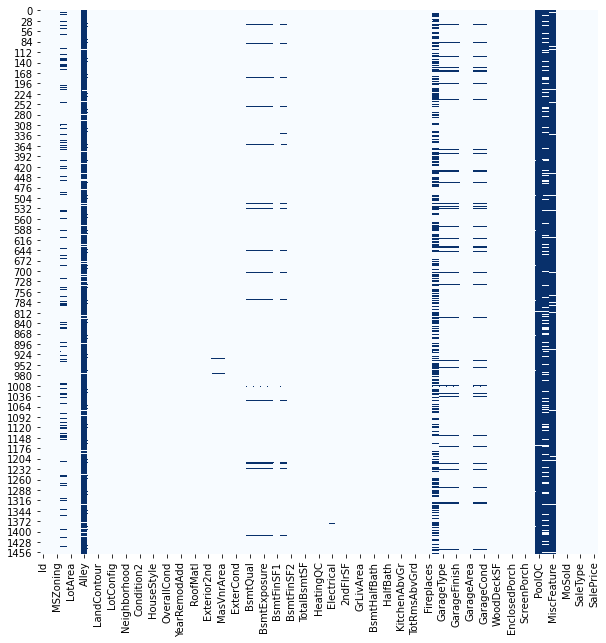

In [13]:
plt.figure(figsize=(10,10)) #plotting missing values
sns.heatmap(df_train.isnull(),cbar=False,cmap='Blues')
plt.ioff()

In [14]:
train_nan=df_train.isnull().sum()/len(df_train)*100 # % of missing value > 0 for train dataset
train_nan = train_nan[train_nan>0]
train_nan.sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

**Handling missing value for train dataset**

In [15]:

for i in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    df_train[i] = df_train[i].fillna('None')

df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())

for i in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea'):
    df_train[i] = df_train[i].fillna(0)
    
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [16]:
test_nan=df_test.isnull().sum()/len(df_test)*100 # % of missing value > 0 for test dataset
test_nan = test_nan[test_nan>0]
test_nan.sort_values(ascending=False)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

**Handling Missing value for test dataset**

In [17]:
for i in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    df_test[i] = df_test[i].fillna('None')

for i in ('TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','LotFrontage'):
    df_test[i]=df_test[i].fillna(df_test[i].median())

for i in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtHalfBath','BsmtFullBath'):
    df_test[i] = df_test[i].fillna(0)
    
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna('Typ') 
df_test['Utilities'] = df_test['Utilities'].fillna('AllPub') 
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0]) 
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna("TA") 
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

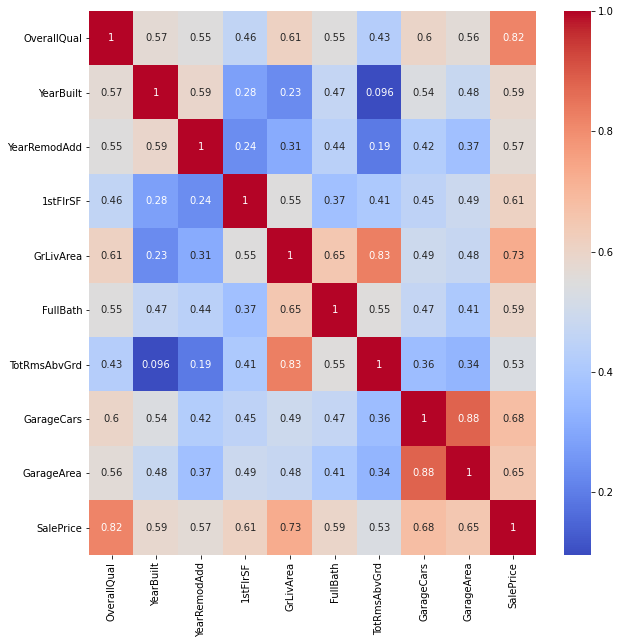

In [18]:
# most correlated features
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="coolwarm")


* 82% correlation between SalePrice and OverallQual.
* 83% correlation between TotRmsAbvGrd and GrLivArea.
* 88% correlation between GarageCars and GarageArea.
....

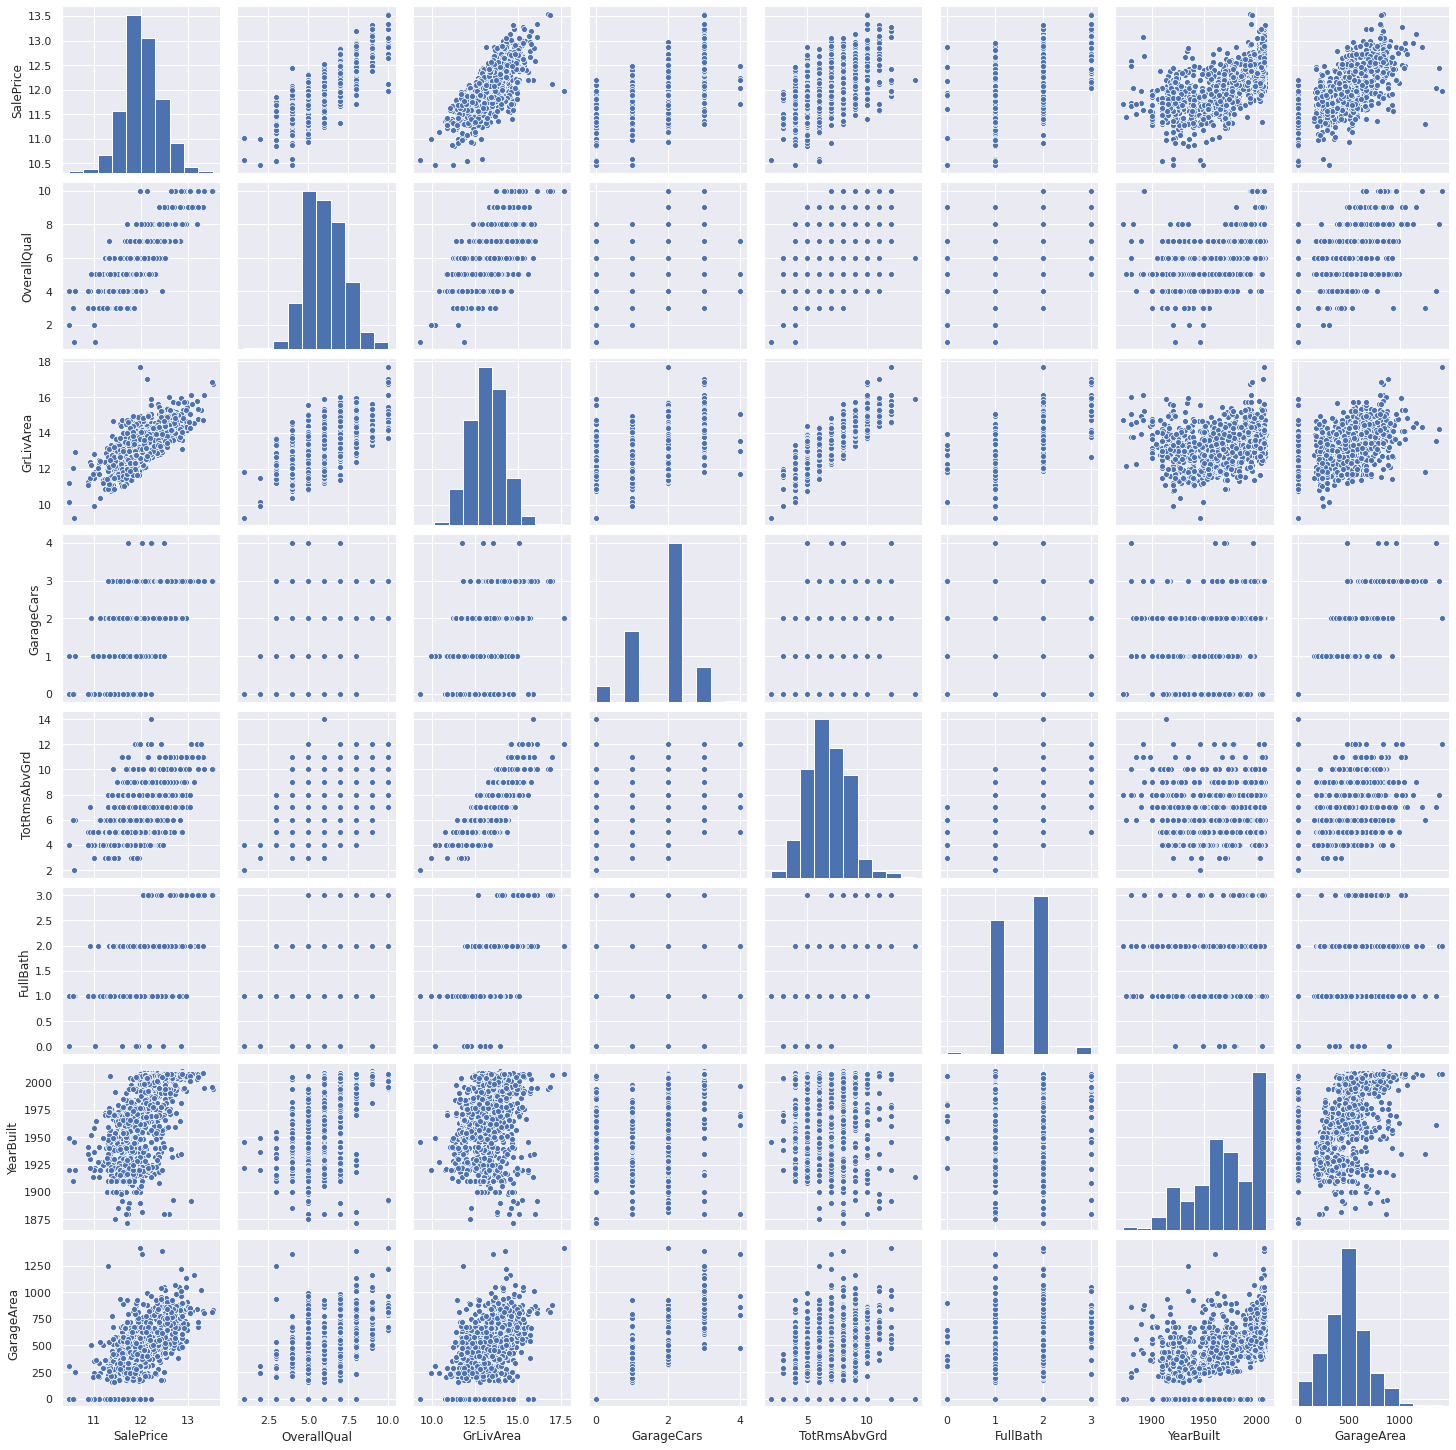

In [19]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt','GarageArea']
sns.pairplot(df_train[cols])
plt.show();

In [20]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
test_id = df_test['Id']
all_data = pd.concat([df_train, df_test], axis=0, sort=False)
all_data = all_data.drop(['Id', 'SalePrice'], axis=1)

In [21]:
all_data=pd.get_dummies(all_data, drop_first=True) # OHE on categorical variable.

In [22]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print(train.shape)
print(test.shape)

(1460, 259)
(1459, 259)


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(train)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000,verbose=0,criterion='mae',max_features='sqrt',oob_score=True,n_jobs=4)
rf_reg.fit(X_train, y_train)
predictions=rf_reg.predict(X_test)

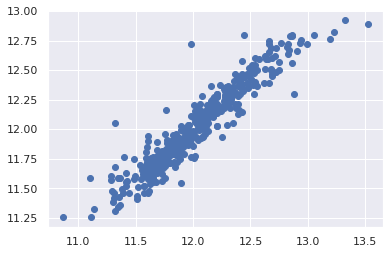

In [26]:
plt.scatter(y_test,predictions)

In [27]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Square',metrics.r2_score(y_test, predictions))

MAE: 0.09207371826082326
MSE: 0.018525865350065458
RMSE: 0.13610975479393628
R2 Square 0.8800986994923232


In [28]:
y_pred=np.floor(np.expm1(rf_reg.predict(test)))

In [29]:
my_submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
my_submission.to_csv('submission.csv', index=False)